 ## UK Road Safety: Traffic Accidents and Vehicles Machine Learning
 
 The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. The dataset consists of accident records from the UK over the course of 15+ years. I hope to show the causes of these accidents through visualizations and create an algorithm that can predict the severity of accidents. 
 
The UK government collects and publishes (usually on an annual basis) detailed information about traffic accidents across the country. This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, number of casualties and vehicle manoeuvres, making this a very interesting and comprehensive dataset for analysis and research.

The data that I'm using is compiled and available through [Kaggle](https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles) and in a less compliled form, [here](https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=2000045). 

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)


Problem: Traffic Accidents<br>
Solution Method: Use data to figure out how to lower the number of accidents and the severity of them.

* [Machine Learning](#Machine-Learning)<br>
    * [Preprocessing](#Preprocessing)<br>
    * [Imbalanced Data](#Imbalanced-Data)<br>
    * [Resample: Undersampling](#Resample:-Undersampling)<br>
    * [Unsupervised Learning](#Unsupervised-Learning)<br>
    * [Supervised Learning with Resampling as Undersampling](#Supervised-Learning-with-Resampling-as-Undersampling)<br>
    * [Supervised Learning Results](#Supervised-Learning-Results)<br>

### Links to Other Notebooks And Presentation
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Introduction, Data Cleaning, and Feature Manipulation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb)__<br>
<br>

__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Visualizations and Solution: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Visualizations_and_Solution.ipynb)__<br>
<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning](UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
__[UK Road Safety: Traffic Accidents and Vehicles Machine Learning: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Machine_Learning.ipynb)__<br>
<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation]("Traffic_Analysis_and_Severity_Prediction.pptx")__<br>
__[Traffic Analysis and Severity Prediction Powerpoint Presentation: Github Link](https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Traffic_Analysis_and_Severity_Prediction.pptx)__<br>

### Importing and Data Merging

In [1]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
import lightgbm as lgb
from kmodes.kmodes import KModes

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # #DATAFRAME PICKLE CREATED IN CELLS BELOW INSTEAD OF RUNNING THROUGH ENTIRE PROCESS AFTER RESTARTING
# # #import pickled file
#df = pd.read_pickle("df.pkl")
# df.to_csv('uktraffic_acc.csv') 

## Machine Learning

In [6]:
#made separate dataframe w. set index that wouldnt effect data vis above
df1=df
#set index to accident_index
df1.set_index('accident_index', inplace=True)
df1.head()

,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,...,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
accident_index,,,,,,,,,,,,,,,,,,,,,
201001BS70003,B,302,0,Slight,None,2010-01-11,Monday,1,Give way or uncontrolled,T or staggered junction,...,Goods Vehicle,No,Front,1,0,7,1,winter,small engine cc,Not Serious
201001BS70004,A,402,4204,Slight,None,2010-01-11,Monday,1,Auto traffic signal,T or staggered junction,...,Car,No,Front,1,0,18,6,winter,medium engine cc,Not Serious
201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,...,Car,No,Nearside,1,1,21,6,winter,medium engine cc,Not Serious
201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,...,Car,No,Front,1,1,21,6,winter,small engine cc,Not Serious
201001BS70008,A,3217,3220,Slight,None,2010-01-04,Monday,1,Auto traffic signal,Crossroads,...,Car,No,Nearside,1,0,20,6,winter,medium engine cc,Not Serious


In [7]:
df1 = df1.drop(['accident_severity'],axis=1)

In [8]:
df1.head()

,1st_road_class,1st_road_number,2nd_road_number,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,latitude,...,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
accident_index,,,,,,,,,,,,,,,,,,,,,
201001BS70003,B,302,0,None,2010-01-11,Monday,1,Give way or uncontrolled,T or staggered junction,51.484087,...,Goods Vehicle,No,Front,1,0,7,1,winter,small engine cc,Not Serious
201001BS70004,A,402,4204,None,2010-01-11,Monday,1,Auto traffic signal,T or staggered junction,51.509212,...,Car,No,Front,1,0,18,6,winter,medium engine cc,Not Serious
201001BS70007,Unclassified,0,0,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,51.513314,...,Car,No,Nearside,1,1,21,6,winter,medium engine cc,Not Serious
201001BS70007,Unclassified,0,0,None,2010-01-02,Saturday,1,Give way or uncontrolled,Mini-roundabout,51.513314,...,Car,No,Front,1,1,21,6,winter,small engine cc,Not Serious
201001BS70008,A,3217,3220,None,2010-01-04,Monday,1,Auto traffic signal,Crossroads,51.484361,...,Car,No,Nearside,1,0,20,6,winter,medium engine cc,Not Serious


In [9]:
print(df1.columns)

Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'local_authority_highway', 'longitude',
       'lsoa_of_accident_location', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'inscotland', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'driver_imd_decile', 'engine_capacity_cc',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidd

### Preprocessing

In [10]:
#separate dtypes
notif=df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['1st_road_class', '1st_road_number', '2nd_road_number',
       'carriageway_hazards', 'date', 'day_of_week',
       'did_police_officer_attend_scene_of_accident', 'junction_control',
       'junction_detail', 'light_conditions', 'local_authority_district',
       'local_authority_highway', 'lsoa_of_accident_location',
       'number_of_casualties', 'number_of_vehicles',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland',
       'age_band_of_driver', 'age_of_vehicle', 'driver_home_area_type',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', 'model',
       'propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
       'towing_and_articulation', 'vehicle_leaving_carriageway',
   

Label Encoder was used instead of OneHotEncoder due to the memory errors One Hot Encoder caused in the data. The algorithms used will be classifiers, through boosting and trees, and not linear. 

In [11]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(561135, 58)


In [12]:
#Set up of X and Y
X= df_ml.drop(['accident_seriousness'],axis=1)
y= df_ml['accident_seriousness']

In [13]:
df_ml.accident_seriousness.value_counts()

0    492804
1     68331
Name: accident_seriousness, dtype: int64

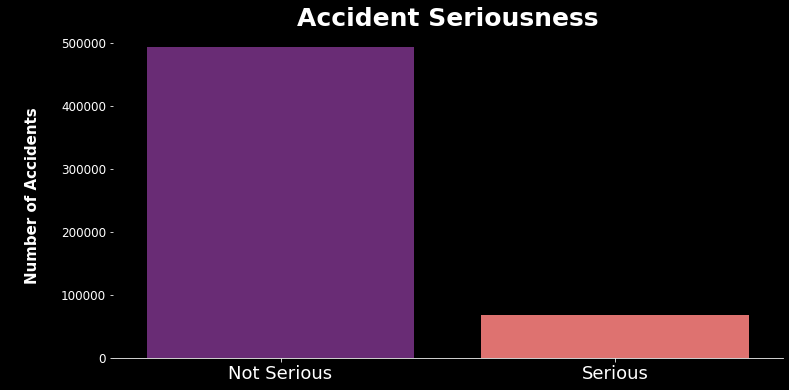

In [14]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_seriousness", palette="magma", data=df)

plt.style.use('dark_background')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

### Imbalanced Data
The data in this dataset is extremely imbalanced for what we are trying to predict. We are going to resample the data as undersampling, where we reduce the number of majority (Not Serious Accidents) samples.<br><br> 
***
The machine learning classifier algorithms that we are going to use are as follows:
* Bagging Classifier (sklearn)
* AdaBoost Classifier (sklearn)
* Random Forest Classifier (sklearn)
* Gradient Boosting Classifier (sklearn)*
* LightGBM Classifier (LightGBM)
* XGBoost Classifier (xgboost)
* Balanced Bagging Classifier(imblearn)
* Balanced Random Forest Classifier (imblearn) 
* Easy Ensemble Classifier (imblearn)<br><br>
***
*Gradient Boosting was commented out because of the time it took to run (18hrs) and not having relevant enough results to still consider.

### Resample: Undersampling

In [15]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [16]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [17]:
# separate minority and majority classes
not_severe = res_X[res_X.accident_seriousness==0]
severe = res_X[res_X.accident_seriousness==1]

In [18]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [19]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])

In [20]:
newdf.accident_seriousness.value_counts()

1    51357
0    51357
Name: accident_seriousness, dtype: int64

In [21]:
res_X_train = newdf.drop('accident_seriousness', axis=1)
res_y_train = newdf.accident_seriousness

### Unsupervised Learning
Before, we get in to predictions, we are going to complete some machine learning in ordered to see how the data relates to each other.
We are going to do this on the resampled data as well, in order to avoid bias. We will use two clusters which, in theory, represent the two variables for accident_seriousness, Not Serious & Serious

In [39]:
# "clustering" using kmode algorithm that is designed to handle mixed data
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1)
fitClusters_huang = km_huang.fit_predict(newdf)
fitClusters_huang

array([1, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [40]:
newdf1 = newdf.copy().reset_index()
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([newdf1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [41]:
combinedDf.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_number,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,...,longitude,speed_limit,year,driver_imd_decile,engine_capacity_cc,month,weekend,hour,accident_seriousness,cluster_predicted
0,201554A415715,0,429,0,1,2148,4,0,2,8,...,-2.110741,30.0,2015,8.0,1299.0,11,0,6,1,1
1,2010440174154,0,27,2391,1,119,0,0,2,6,...,-1.319297,30.0,2010,5.0,1997.0,4,1,0,1,0
2,201506N097860,5,0,0,1,1880,5,0,2,8,...,-2.295013,30.0,2015,8.0,2143.0,2,0,12,1,1
3,2016460101917,0,252,251,1,2426,5,0,2,6,...,0.878850,40.0,2016,8.0,1560.0,8,0,18,1,0
4,201342I085803,0,120,0,1,1182,4,0,2,8,...,0.674514,60.0,2013,9.0,1149.0,3,0,19,1,0


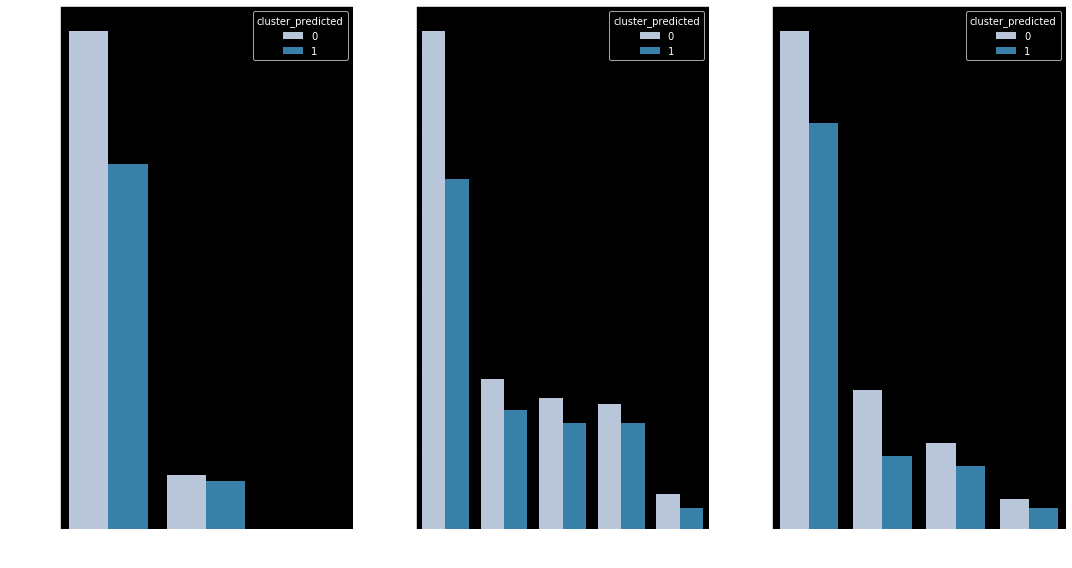

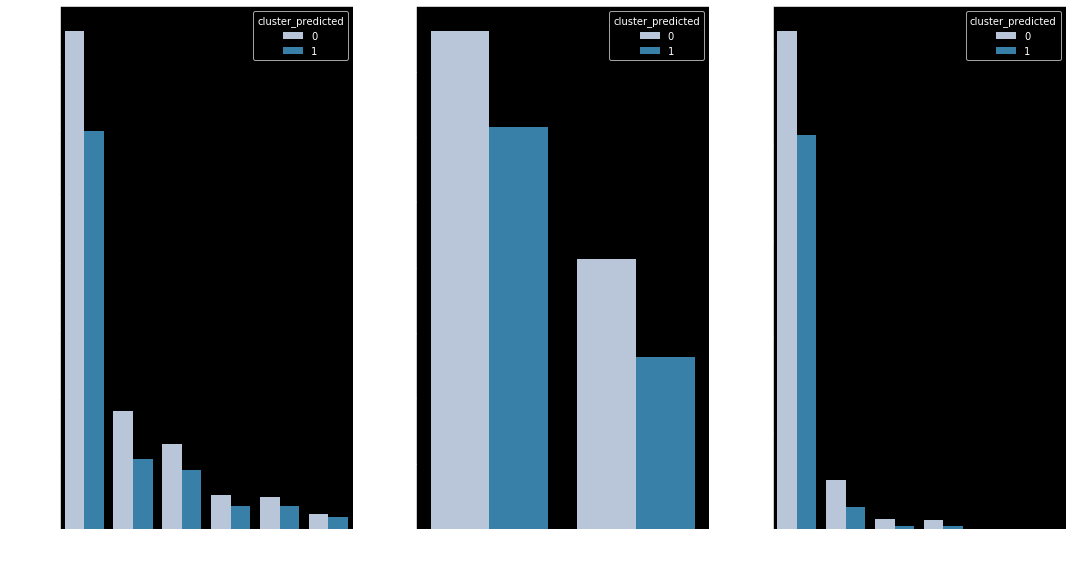

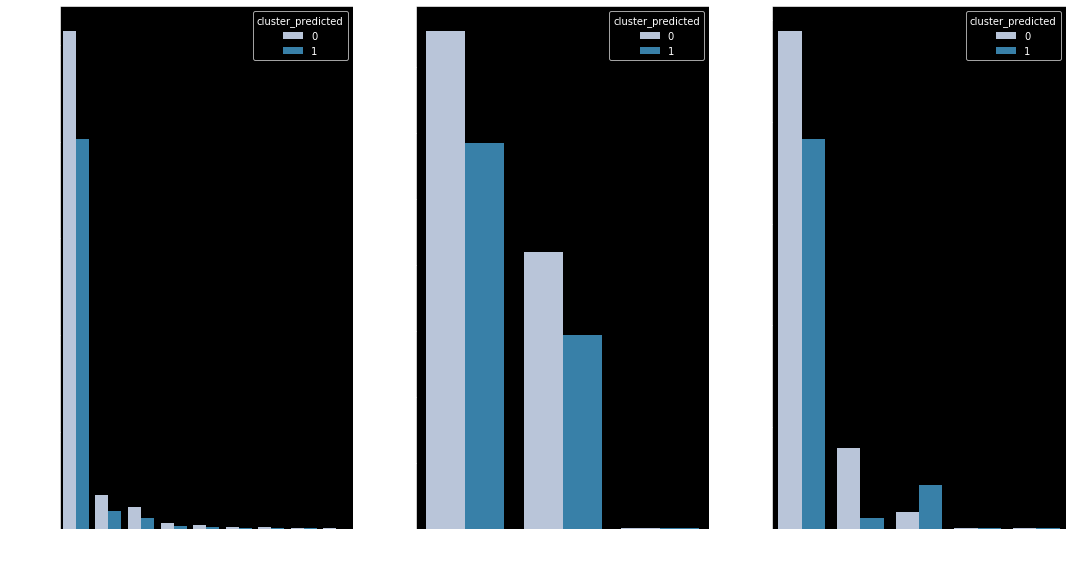

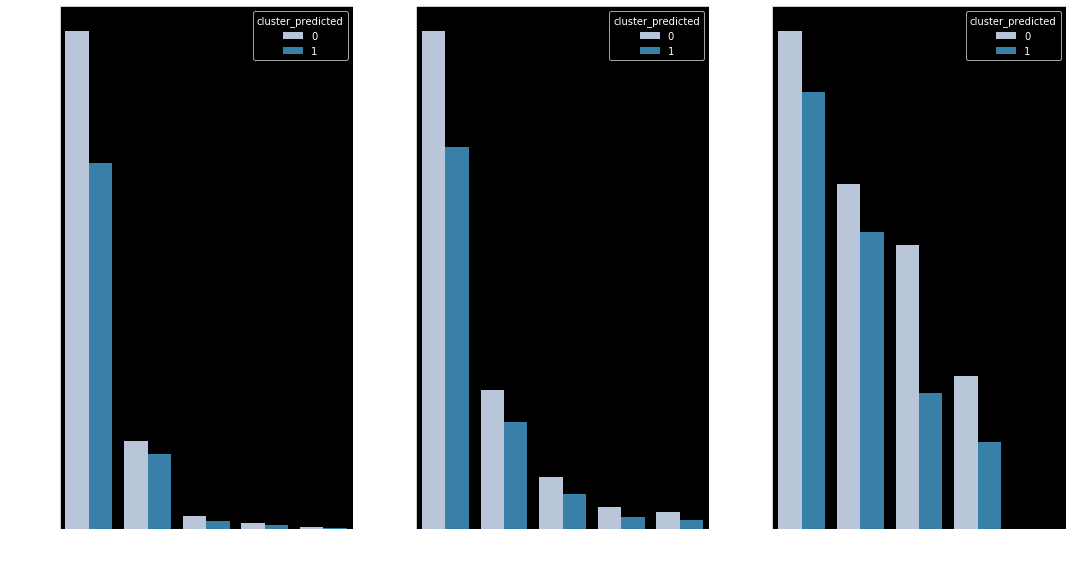

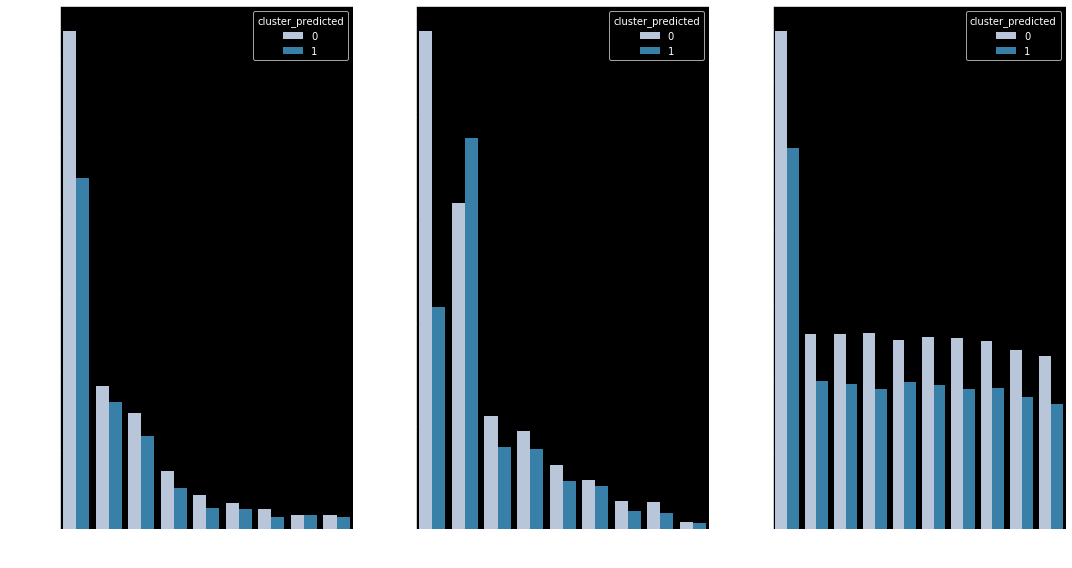

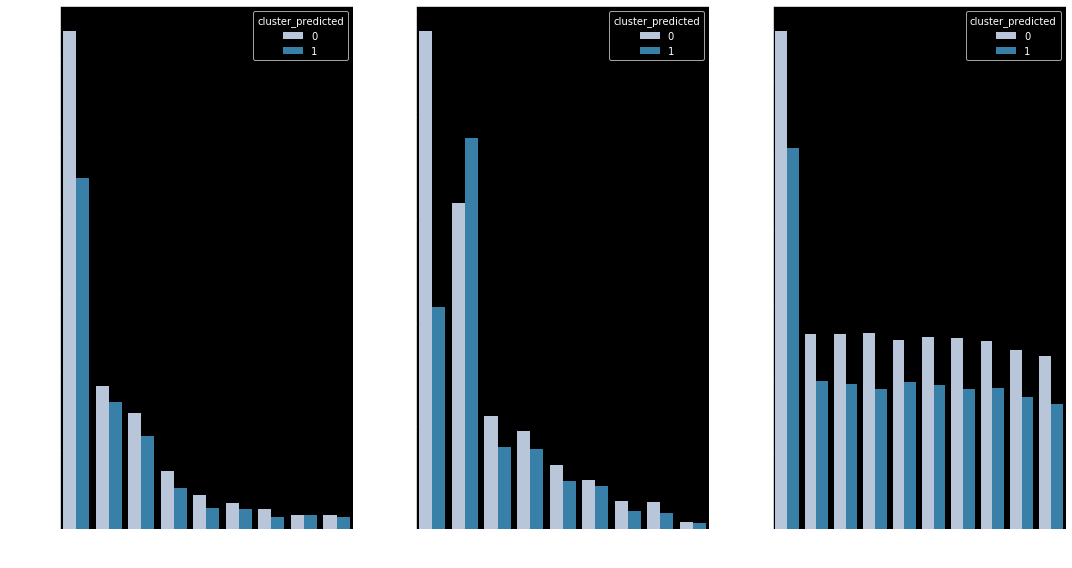

In [44]:
#plotting a few of these features just to see how they relate to the clustering for seriousness
f, axs = plt.subplots(1,3,figsize = (15,8))
sns.countplot(x=combinedDf['did_police_officer_attend_scene_of_accident'],
              order=combinedDf['did_police_officer_attend_scene_of_accident'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])

sns.countplot(x=combinedDf['x1st_point_of_impact'],
              order=combinedDf['x1st_point_of_impact'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])

sns.countplot(x=combinedDf['number_of_vehicles'],
              order=combinedDf['number_of_vehicles'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot1.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['speed_limit'],
              order=combinedDf['speed_limit'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['urban_or_rural_area'],
              order=combinedDf['urban_or_rural_area'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['skidding_and_overturning'],
              order=combinedDf['skidding_and_overturning'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot2.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['vehicle_leaving_carriageway'],
              order=combinedDf['vehicle_leaving_carriageway'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['sex_of_driver'],
              order=combinedDf['sex_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['vehicle_type'],
              order=combinedDf['vehicle_type'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot3.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_control'],
              order=combinedDf['junction_control'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['number_of_casualties'],
              order=combinedDf['number_of_casualties'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['age_band_of_driver'],
              order=combinedDf['age_band_of_driver'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot4.png')
plt.show()



f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot5.png')
plt.show()


f, axs = plt.subplots(1,3,figsize = (15,8))

sns.countplot(x=combinedDf['junction_detail'],
              order=combinedDf['junction_detail'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[0])
sns.countplot(x=combinedDf['junction_location'],
              order=combinedDf['junction_location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[1])
sns.countplot(x=combinedDf['driver_imd_decile'],
              order=combinedDf['driver_imd_decile'].value_counts().index,
              hue=combinedDf['cluster_predicted'], palette='PuBu', ax=axs[2])
plt.tight_layout()
plt.savefig('clusterplot6.png')
plt.show()

Looking at these graphs we can see the patterns of how each category of eacch column pairs off with the clustering on accident_seriousness.

### Supervised Learning with Resampling as Undersampling

#### Bagging Classifier with Resampling

Resampled Bagging Classifier Accuracy Score: 66.97%
Resampled Bagging Classifier F1 Score: 55.81%
Resampled Bagging Classifier Precision Score: 58.10%
Resampled Bagging Classifier Recall Score: 67.88%
Resampled Bagging Classifier Cross Validation Score: 69.11%




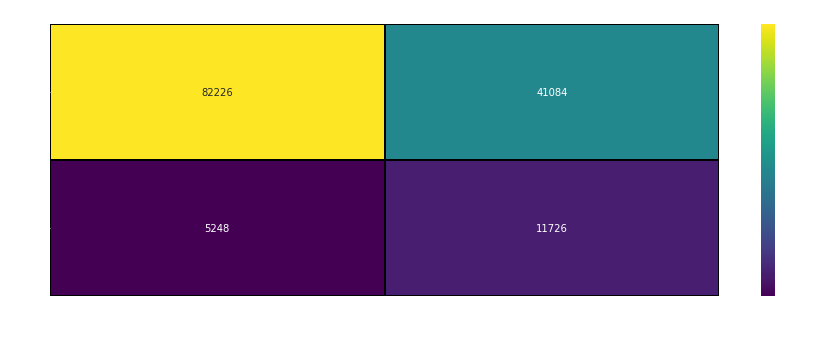

Resampled Bagging Classifier Time: 5531.351397275925


In [30]:
#start timming
start_bagc_res = time.time()

#Resampled Bagging Classifier
bagc_res = BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42)

bagc_res.fit(res_X_train, res_y_train)
pred_bagc_res = bagc_res.predict(res_X_test)


#Check Scores

print("Resampled Bagging Classifier Accuracy Score: {:0.2f}%".format(accuracy_score(res_y_test,
                                                                               pred_bagc_res )*100))
print("Resampled Bagging Classifier F1 Score: {:0.2f}%".format(f1_score(res_y_test,
                                                                   pred_bagc_res,average="macro")*100))
print("Resampled Bagging Classifier Precision Score: {:0.2f}%".format(precision_score(res_y_test,
                                                                                 pred_bagc_res, 
                                                                                 average="macro")*100))
print("Resampled Bagging Classifier Recall Score: {:0.2f}%".format(recall_score(res_y_test, 
                                                                           pred_bagc_res,
                                                                           average="macro")*100))
print("Resampled Bagging Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(bagc_res, res_X_train, res_y_train, cv=5)*100)))
print('\n')

# Creates a confusion matrix
bagc_res_cm = confusion_matrix(res_y_test,pred_bagc_res)

# Transform to df for easier plotting
bagc_res_cm_df = pd.DataFrame(bagc_res_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(bagc_res_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Bagging Classifier Accuracy: {0:.2f}%'
          .format(accuracy_score(res_y_test,pred_bagc_res )*100),fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()

#end time
end_bagc_res = time.time()
print("Resampled Bagging Classifier Time:", end_bagc_res - start_bagc_res)

In [31]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_bagc_res).ravel()

accuracy = accuracy_score(res_y_test,pred_bagc_res )*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Bagging Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Bagging Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Bagging Classifier  Error Rate Score: {0:.2f}%".format(ers))
print("Resampled Bagging Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(res_y_test,pred_bagc_res)*100))

Resampled Bagging Classifier Specificity Score: 66.68%
Resampled Bagging Classifier False Positive Rate Score: 33.32%
Resampled Bagging Classifier  Error Rate Score: 33.03%
Resampled Bagging Classifier Roc Auc Score: 67.88%


#### AdaBoost Classifier with Resampling

AdaBoost is a boosting algorithm and is widely used to process imbalanced data. It uses a single-layer decision tree as a weak classifier. In each training iteration, the weight of the misclassified samples generated by the previous iteration is increased, and the weight of the correctly classified samples is reduced, improving the significance of the misclassified samples in the next iteration. Although the AdaBoost algorithm can be directly used to process imbalanced data, the algorithm focuses more on the misclassified samples than samples of minority class. In addition, it may generate many redundant or useless weak classifiers, increasing the processing overhead and causing performance reduction.<br><br>

With this being said, we will use AdaBoost on the resampled set and below for the class_weight sets we will use it regularly to see how it handles the imbalanced data on it's own vs resampling.<br><br>

See: [Improved PSO_AdaBoost Ensemble Algorithm for Imbalanced Data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6471212/)

Resampled AdaBoost Classifier Cross Validation Score: 65.73%




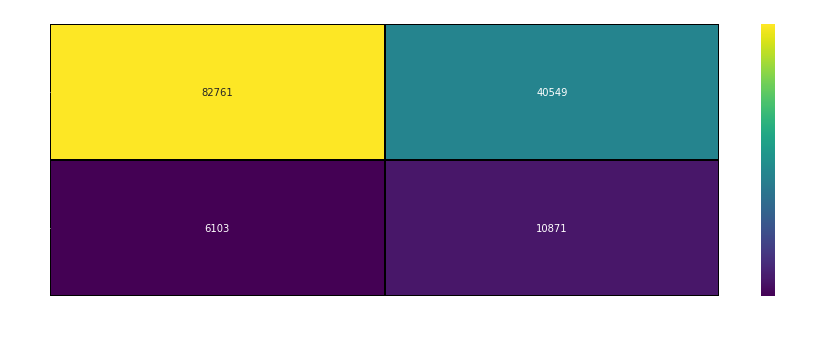

Resampled AdaBoost Classifier Time: 389.8358860015869


In [32]:
#start
start_res_adbc = time.time()


#Resampled AdaBoost Classifier 
res_adbc = AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42)
res_adbc.fit(res_X_train, res_y_train)
pred_res_adbc = res_adbc.predict(res_X_test)

#Check scores

print("Resampled AdaBoost Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_adbc, res_X_train, res_y_train, cv=3)*100)))
print('\n')

# Creates a confusion matrix
res_adbc_cm = confusion_matrix(res_y_test,pred_res_adbc)

# Transform to dataframe for easier plotting
res_adbc_cm_df = pd.DataFrame(res_adbc_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_adbc_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled AdaBoost Classifier Accuracy: {0:.2f}%'
          .format(accuracy_score(res_y_test,pred_res_adbc )*100),fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()

#end time
end_res_adbc = time.time()
print("Resampled AdaBoost Classifier Time:", end_res_adbc - start_res_adbc)

In [33]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_adbc).ravel()

accuracy = accuracy_score(res_y_test,pred_res_adbc)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled AdaBoost Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled AdaBoost Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled AdaBoost Classifier Error Rate Score: {0:.2f}%".format(ers))
print("Resampled AdaBoost Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_adbc )*100))
print("Resampled AdaBoost Classifier F1 Score: {:0.2f}%"
      .format(f1_score(res_y_test, pred_res_adbc,average="macro")*100))
print("Resampled AdaBoost Classifier Precision Score: {:0.2f}%"
      .format(precision_score(res_y_test, pred_res_adbc, average="macro")*100))
print("Resampled AdaBoost Classifier Recall Score: {:0.2f}%"
      .format(recall_score(res_y_test, pred_res_adbc, average="macro")*100))
print("Resampled AdaBoost Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(res_y_test,pred_res_adbc)*100))

Resampled AdaBoost Classifier Specificity Score: 67.12%
Resampled AdaBoost Classifier False Positive Rate Score: 32.88%
Resampled AdaBoost Classifier Error Rate Score: 33.26%
Resampled AdaBoost Classifier Accuracy Score: 66.74%
Resampled AdaBoost Classifier F1 Score: 54.90%
Resampled AdaBoost Classifier Precision Score: 57.14%
Resampled AdaBoost Classifier Recall Score: 65.58%
Resampled AdaBoost Classifier Roc Auc Score: 65.58%


#### Random Forest Classifier with Resampling

Resampled Random Forest Classifier Cross Validation Score: 68.85%




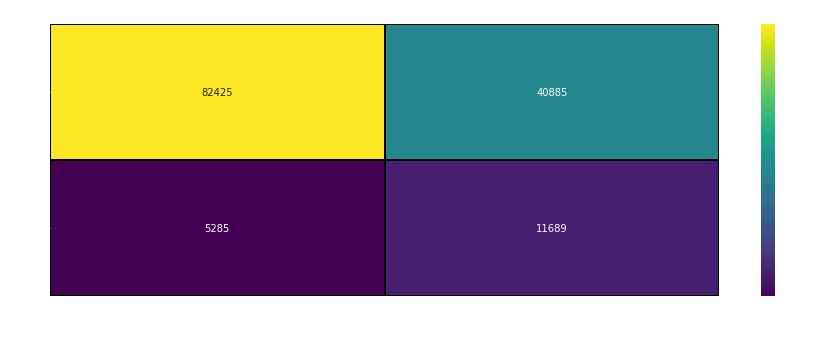


Resampled Random Forest Time:  4370.322077035904


In [34]:
#start
start_res_rfc = time.time()

#random forest
res_rfc = RandomForestClassifier(criterion='entropy', max_depth=40,
                                 max_features=X.shape[1], min_samples_split=8,
                                 n_estimators=500, random_state=42)
res_rfc.fit(res_X_train, res_y_train)
pred_res_rfc = res_rfc.predict(res_X_test)


#cv

print("Resampled Random Forest Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_rfc, res_X_train, res_y_train, cv=3)*100)))
print('\n')

# Creates a confusion matrix
res_rfc_cm = confusion_matrix(res_y_test,pred_res_rfc)

# Transform to df for easier plotting
res_rfc_cm_df = pd.DataFrame(res_rfc_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_rfc_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Random Forest Accuracy: {0:.2f}%'.format(accuracy_score(res_y_test,
                                                                            pred_res_rfc)*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
end_res_rfc = time.time()
print("\nResampled Random Forest Time: ", end_res_rfc - start_res_rfc)

In [35]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_rfc).ravel()

accuracy = accuracy_score(res_y_test,pred_res_rfc)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Random Forest Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Random Forest Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Random Forest Classifier Error Rate Score: {0:.2f}%".format(ers))
print("Resampled Random Forest Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_rfc )*100))
print("Resampled Random Forest Classifier F1 Score: {:0.2f}%"
      .format(f1_score(res_y_test, pred_res_rfc,average="macro")*100))
print("Resampled Random Forest Classifier Precision Score: {:0.2f}%"
      .format(precision_score(res_y_test, pred_res_rfc, average="macro")*100))
print("Resampled Random Forest Classifier Recall Score: {:0.2f}%"
      .format(recall_score(res_y_test, pred_res_rfc, average="macro")*100))
print("Resampled Random Forest Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(res_y_test, pred_res_rfc)*100))

Resampled Random Forest Classifier Specificity Score: 66.84%
Resampled Random Forest Classifier False Positive Rate Score: 33.16%
Resampled Random Forest Classifier Error Rate Score: 32.91%
Resampled Random Forest Classifier Accuracy Score: 67.09%
Resampled Random Forest Classifier F1 Score: 55.87%
Resampled Random Forest Classifier Precision Score: 58.10%
Resampled Random Forest Classifier Recall Score: 67.85%
Resampled Random Forest Classifier Roc Auc Score: 67.85%


#### Gradient Boosting Classifier with Resampling

In [36]:
# #Resampled Gradient Boosting Classifier was taken out of the running due to its run time of almost a day
# start_res_gbc = time.time()
# res_gbc = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth=40,
#                                               min_samples_leaf=1, n_estimators=500,
#                                               random_state = 42)
# res_gbc.fit(res_X_train, res_y_train)
# pred_res_gbc = res_gbc.predict(res_X_test)

# #Check accuracy
# print("Resampled Gradient Boosting Classifier Accuracy Score: {:0.2f}%"
#       .format(accuracy_score(res_y_test,pred_res_gbc )*100))
# print("Resampled Gradient Boosting Classifier F1 Score: {:0.2f}%"
#       .format(f1_score(res_y_test, pred_res_gbc,average="macro")*100))
# print("Resampled Gradient Boosting Classifier Precision Score: {:0.2f}%"
#       .format(precision_score(res_y_test, pred_res_gbc, average="macro")*100))
# print("Resampled Gradient Boosting Classifier Recall Score: {:0.2f}%"
#       .format(recall_score(res_y_test, pred_res_gbc, average="macro")*100))
# print("Resampled Gradient Boosting Classifier Cross Validation Score: {:0.2f}%"
#       .format(np.mean(cross_val_score(res_gbc, res_X_train, res_y_train, cv=5)*100)))
# print('\n')

# # Creates a confusion matrix
# res_gbc_cm = confusion_matrix(res_y_test,pred_res_gbc)

# # Transform to df for easier plotting
# res_gbc_cm_df = pd.DataFrame(res_gbc_cm,
#                      index = ['Not Serious','Serious'], 
#                      columns = ['Not Serious','Serious'])

# plt.figure(figsize=(15,5))

# sns.heatmap(res_gbc_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
# plt.title('Resampled Gradient Boosting Classifier Accuracy: {0:.2f}%'.format(accuracy_score(res_y_test,
#                                                                             pred_res_gbc)*100),
#           fontsize=15)
# plt.ylabel('Actual\n')
# plt.xlabel('Predicted\n')
# plt.show()
# end_res_gbc = time.time()
# print("\nResampled Gradient Boosting Time: ", end_res_gbc - start_res_gbc)
# print("Resampled Gradient Boosting Time:", end_res_gbc - start_res_gbc)



#place results for Gradient Boosting here (from machine learning notebook) but do NOT re-run.

# Resampled Gradient Boosting Classifier Accuracy Score: 58.26%
# Resampled Gradient Boosting Classifier F1 Score: 48.58%
# Resampled Gradient Boosting Classifier Precision Score: 54.15%
# Resampled Gradient Boosting Classifier Recall Score: 59.65%
# Resampled Gradient Boosting Classifier Cross Validation Score: 61.43%

# Resampled Gradient Boosting Time:  67961.71300411224

# Confusion Matrix: 
# [[71301,52009],
# [6540,10434]]


#### LightGBM Classifier with Resampling

Resampled LightGBM Classifier Cross Validation Score: 68.32%




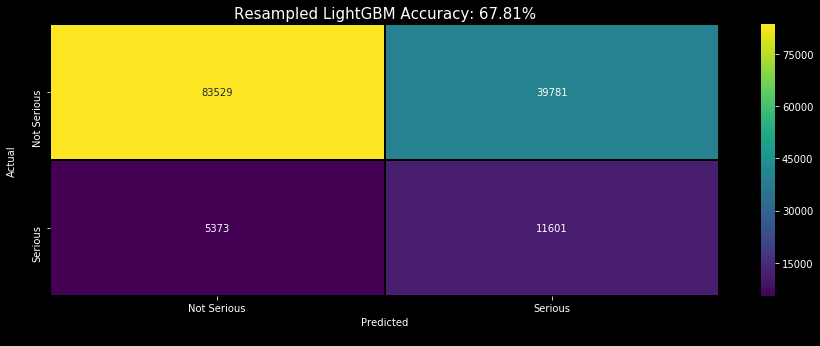


Resampled LightGBM Time:  72.83225631713867


In [22]:
#Light GBM

start_res_lgbm = time.time()
res_lgbm = lgb.LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                           n_estimators=500, num_leaves=50, random_state = 42)
res_lgbm.fit(res_X_train, res_y_train)
pred_res_lgbm = res_lgbm.predict(res_X_test)

#check cv
print("Resampled LightGBM Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_lgbm, res_X_train, res_y_train, cv=5)*100)))
print('\n')


res_lgbm_cm = confusion_matrix(res_y_test, pred_res_lgbm)
# Transform to df for easier plotting
res_lgbm_cm_df = pd.DataFrame(res_lgbm_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_lgbm_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled LightGBM Accuracy: {0:.2f}%'.format(accuracy_score(res_y_test,
                                                                            pred_res_lgbm)*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
end_res_lgbm = time.time()
print("\nResampled LightGBM Time: ", end_res_lgbm - start_res_lgbm)


In [19]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_lgbm).ravel()

accuracy = accuracy_score(res_y_test,pred_res_lgbm)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled LightGBM Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled LightGBM Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled LightGBM Classifier Error Rate Score: {0:.2f}%".format(ers))
#check accuracy
print("Resampled LightGBM Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_lgbm )*100))
print("Resampled LightGBM Classifier F1 Score: {:0.2f}%"
      .format(f1_score(res_y_test, pred_res_lgbm,average="macro")*100))
print("Resampled LightGBM Classifier Precision Score: {:0.2f}%"
      .format(precision_score(res_y_test, pred_res_lgbm, average="macro")*100))
print("Resampled LightGBM Classifier Recall Score: {:0.2f}%"
      .format(recall_score(res_y_test, pred_res_lgbm, average="macro")*100))
print("Resampled LightGBM Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(res_y_test, pred_res_lgbm)*100))

Resampled LightGBM Classifier Specificity Score: 67.74%
Resampled LightGBM Classifier False Positive Rate Score: 32.26%
Resampled LightGBM Classifier Error Rate Score: 32.19%
Resampled LightGBM Classifier Accuracy Score: 67.81%
Resampled LightGBM Classifier F1 Score: 56.33%
Resampled LightGBM Classifier Precision Score: 58.27%
Resampled LightGBM Classifier Recall Score: 68.04%
Resampled LightGBM Classifier Roc Auc Score: 68.04%


#### XGBoost Classifier with Resampling

Resampled XGBoost Classifier Cross Validation Score: 68.79%




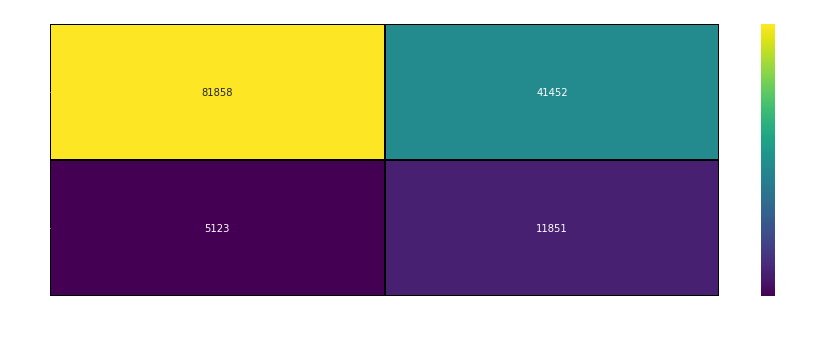

Resampled XGBoost Time: 4441.273263931274


In [20]:
#XGBoost
start_res_xgb = time.time()
res_xgb = XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)
res_xgb.fit(res_X_train, res_y_train)

pred_res_xgb = res_xgb.predict(res_X_test)

#check accuracy
print("Resampled XGBoost Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_xgb, res_X_train, res_y_train, cv=3)*100)))
print('\n')
# Transform to df for easier plotting of confusion matrix
res_xgb_cm = confusion_matrix(res_y_test, pred_res_xgb)
res_xgb_cm_df = pd.DataFrame(res_xgb_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_xgb_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled XGBoost Accuracy: {0:.2f}%'.format(accuracy_score(res_y_test,
                                                                            pred_res_xgb)*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()

end_res_xgb = time.time()
print("Resampled XGBoost Time:", end_res_xgb - start_res_xgb)


In [21]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_xgb).ravel()

accuracy = accuracy_score(res_y_test,pred_res_xgb)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled XGBoost Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled XGBoost Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled XGBoost Classifier Error Rate Score: {0:.2f}%".format(ers))
print("Resampled XGBoost Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_xgb)*100))
print("Resampled XGBoost Classifier F1 Score: {:0.2f}%"
      .format(f1_score(res_y_test, pred_res_xgb,average="macro")*100))
print("Resampled XGBoost Classifier Precision Score: {:0.2f}%"
      .format(precision_score(res_y_test, pred_res_xgb, average="macro")*100))
print("Resampled XGBoost Classifier Recall Score: {:0.2f}%"
      .format(recall_score(res_y_test, pred_res_xgb, average="macro")*100))
print("Resampled XGBoost Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(res_y_test, pred_res_xgb)*100))

Resampled XGBoost Classifier Specificity Score: 66.38%
Resampled XGBoost Classifier False Positive Rate Score: 33.62%
Resampled XGBoost Classifier Error Rate Score: 33.20%
Resampled XGBoost Classifier Accuracy Score: 66.80%
Resampled XGBoost Classifier F1 Score: 55.79%
Resampled XGBoost Classifier Precision Score: 58.17%
Resampled XGBoost Classifier Recall Score: 68.10%
Resampled XGBoost Classifier Roc Auc Score: 68.10%


For the following "Balanced" algorithms from imblearn we will be using the standard testing and training sets (X_train, X_test, y_train, y_test) and will allow the algorithms to do the resampling.<br> <br>For the sampling_strategy, we will be using "majority" as the solution.<br><br>'majority': resample only the majority class


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

#### Balanced Bagging Classifier

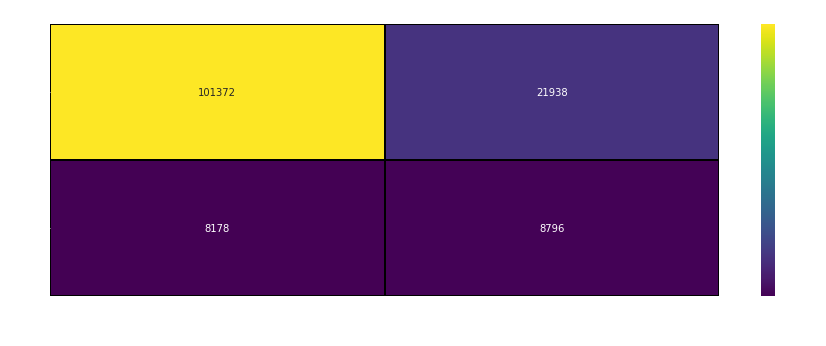

Resampled Balanced Bagging Classifier Cross Validation Score: 78.47%



Resampled Balanced Bagging Time:  12142.180311203003


In [43]:
#start
start_res_bbag = time.time()

# Balanced Bagging Classifier
res_bbag = BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=500, replacement=True, 
                                     sampling_strategy='majority', random_state=42)

res_bbag.fit(X_train, y_train)
pred_res_bbag = res_bbag.predict(X_test)


# Creates a confusion matrix
res_bbag_cm = confusion_matrix(y_test,pred_res_bbag)

# Transform to df for easier plotting
res_bbag_cm_df = pd.DataFrame(res_bbag_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_bbag_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Bagging Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_bbag )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
print("Resampled Balanced Bagging Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_bbag, X_train, y_train, cv=5)*100)))
print('\n')
#end
end_res_bbag = time.time()
print("\nResampled Balanced Bagging Time: ",end_res_bbag - start_res_bbag)

In [44]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred_res_bbag).ravel()

accuracy = accuracy_score(y_test,pred_res_bbag)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Balanced Bagging Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Bagging Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Bagging Classifier Error Rate Score: {0:.2f}%".format(ers))

#Check scores
print("Resampled Balanced Bagging Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(y_test,pred_res_bbag )*100))
print("Resampled Balanced Bagging Classifier F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_bbag,average="macro")*100))
print("Resampled Balanced Bagging Classifier Precision Score: {:0.2f}%"
      .format(precision_score(y_test, pred_res_bbag, average="macro")*100))
print("Resampled Balanced Bagging Classifier Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_bbag, average="macro")*100))
print("Resampled Balanced Bagging  Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_bbag)*100))

Resampled Balanced Bagging Classifier Specificity Score: 82.21%
Resampled Balanced Bagging Classifier False Positive Rate Score: 17.79%
Resampled Balanced Bagging Classifier Error Rate Score: 21.47%
Resampled Balanced Bagging Classifier Accuracy Score: 78.53%
Resampled Balanced Bagging Classifier F1 Score: 61.97%
Resampled Balanced Bagging Classifier Precision Score: 60.58%
Resampled Balanced Bagging Classifier Recall Score: 67.01%
Resampled Balanced Bagging  Classifier Roc Auc Score: 67.01%


#### Resampled Easy Ensemble Classifier (Imblearn's AdaBoost)

Resampled Balanced Easy Ensemble Classifier Cross Validation Score: 66.83%




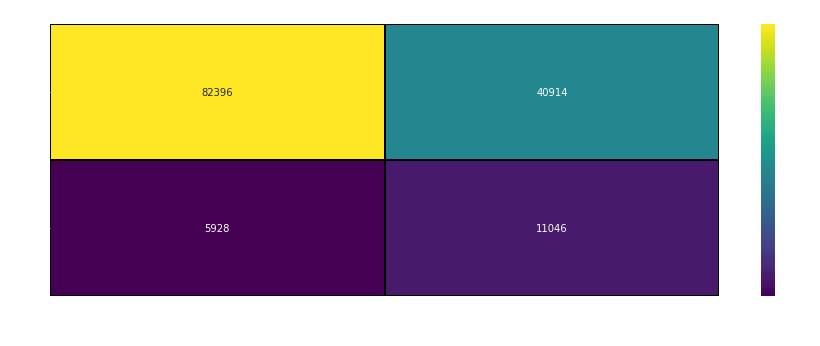


Resampled Balanced Easy Ensemble Time:  37473.19004392624


In [45]:
#start
start_res_eec = time.time()

#EasyEnsembleClassifier
res_eec = EasyEnsembleClassifier(n_estimators=500, random_state=42, replacement=True, 
                                 sampling_strategy='majority')

res_eec.fit(X_train, y_train)
pred_res_eec = res_eec.predict(X_test)

print("Resampled Balanced Easy Ensemble Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_eec, X_train, y_train, cv=5)*100)))
print('\n')
# Creates a confusion matrix
res_eec_cm = confusion_matrix(y_test,pred_res_eec)

# Transform to df for easier plotting
res_eec_cm_df = pd.DataFrame(res_eec_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_eec_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Easy Ensemble Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_eec )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()

#end
end_res_eec = time.time()
print("\nResampled Balanced Easy Ensemble Time: ",end_res_eec - start_res_eec)

In [46]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_eec).ravel()

accuracy = accuracy_score(res_y_test,pred_res_eec)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Balanced Easy Ensemble Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Easy Ensemble Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Easy Ensemble Classifier Error Rate Score: {0:.2f}%".format(ers))

#Check accuracy
print("Resampled Balanced Easy Ensemble Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(y_test,pred_res_eec )*100))
print("Resampled Balanced Easy Ensemble Classifier F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_eec,average="macro")*100))
print("Resampled Balanced Easy Ensemble Classifier Precision Score: {:0.2f}%"
      .format(precision_score(y_test, pred_res_eec, average="macro")*100))
print("Resampled Balanced Easy Ensemble Classifier Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_eec, average="macro")*100))
print("Resampled Balanced Easy Ensemble  Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_eec)*100))

Resampled Balanced Easy Ensemble Classifier Specificity Score: 66.82%
Resampled Balanced Easy Ensemble Classifier False Positive Rate Score: 33.18%
Resampled Balanced Easy Ensemble Classifier Error Rate Score: 33.39%
Resampled Balanced Easy Ensemble Classifier Accuracy Score: 66.61%
Resampled Balanced Easy Ensemble Classifier F1 Score: 54.96%
Resampled Balanced Easy Ensemble Classifier Precision Score: 57.27%
Resampled Balanced Easy Ensemble Classifier Recall Score: 65.95%
Resampled Balanced Easy Ensemble  Classifier Roc Auc Score: 65.95%


#### Resampled Balanced Random Forest Classifier

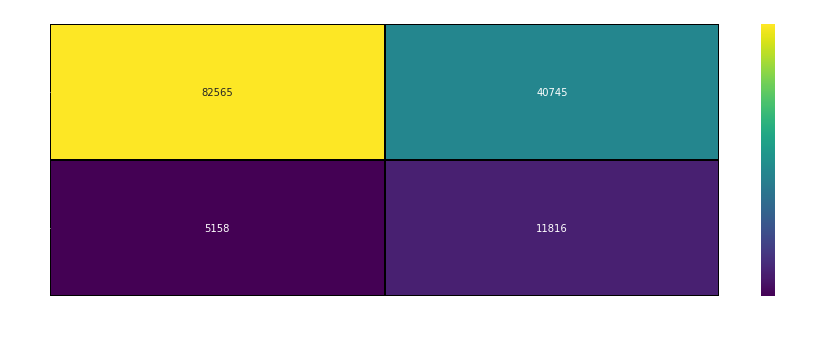

Resampled Balanced Random Forest Classifier Cross Validation Score: 67.28%



Resampled Balanced Random Forest Time:  7261.670822143555


In [47]:
#start
start_res_brfc = time.time()

# Balanced Random Forest Classifier
res_brfc = BalancedRandomForestClassifier(criterion='entropy', max_depth=40,
                                          min_samples_leaf = 1, max_features=X.shape[1], 
                                          sampling_strategy='majority', replacement=True,
                                          min_samples_split=8, n_estimators=500, 
                                          random_state=42)

res_brfc.fit(X_train, y_train)
pred_res_brfc = res_brfc.predict(X_test)

# Creates a confusion matrix
res_brfc_cm = confusion_matrix(y_test,pred_res_brfc)

# Transform to df for easier plotting
res_brfc_cm_df = pd.DataFrame(res_brfc_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_brfc_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Random Forest Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_brfc )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()
print("Resampled Balanced Random Forest Classifier Cross Validation Score: {:0.2f}%"
      .format(np.mean(cross_val_score(res_brfc, X_train, y_train, cv=5)*100)))
print('\n')

#end
end_res_brfc = time.time()
print("\nResampled Balanced Random Forest Time: ",end_res_brfc - start_res_brfc)

In [48]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(res_y_test,pred_res_brfc).ravel()

accuracy = accuracy_score(res_y_test,pred_res_brfc)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Balanced Random Forest Classifier Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Random Forest Classifier False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Random Forest Classifier Error Rate Score: {0:.2f}%".format(ers))
#Check accuracy


#Check accuracy
print("Resampled Balanced Random Forest Classifier Accuracy Score: {:0.2f}%"
      .format(accuracy_score(y_test,pred_res_brfc )*100))
print("Resampled Balanced Random Forest Classifier F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_brfc,average="macro")*100))
print("Resampled Balanced Random Forest Classifier Precision Score: {:0.2f}%"
      .format(precision_score(y_test, pred_res_brfc, average="macro")*100))
print("Resampled Balanced Random Forest Classifier Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_brfc, average="macro")*100))
print("Resampled Balanced Random Forest Classifier Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_brfc)*100))

Resampled Balanced Random Forest Classifier Specificity Score: 66.96%
Resampled Balanced Random Forest Classifier False Positive Rate Score: 33.04%
Resampled Balanced Random Forest Classifier Error Rate Score: 32.72%
Resampled Balanced Random Forest Classifier Accuracy Score: 67.28%
Resampled Balanced Random Forest Classifier F1 Score: 56.12%
Resampled Balanced Random Forest Classifier Precision Score: 58.30%
Resampled Balanced Random Forest Classifier Recall Score: 68.28%
Resampled Balanced Random Forest Classifier Roc Auc Score: 68.28%


#### Supervised Learning Results
Below we have compiled a dataframe and visualization of the scores above in order to determine which algorithm would be best for this data.

In [22]:
#create list of results
results_data={'Learning Algorithm':['Bagging','AdaBoost', 'Random Forest', 'LightGBM','XGBoost',
                                    'Balanced Bagging', 'Easy Ensemble', 'Balanced Random Forest'],
              'Accuracy  Score':[66.97,66.74,67.09,67.81,66.8,78.53,66.61,67.28],
              'F1 Score ':[55.81,54.9,55.87,56.33,55.79,61.97,54.96,56.12],
              'Precision Score':[58.1,57.14,58.1,58.27,58.17,60.58,57.27,58.3],
              'Recall Score':[67.88,65.58,67.85,68.04,68.1,67.01,65.95,68.28],
              'Cross Validation Score':[69.11,65.73,69.15,68.32,69.24,78.47,66.83,67.28],
              'Specificity Score':[66.68,67.12,66.84,67.74,66.38,82.21,66.82,66.96], 
              'Error Rate':[33.03,33.26,32.91,32.19,33.2,17.79,33.39,32.72],
              'False Positive Rate':[33.32,32.88,33.16,32.26,33.62,21.47,33.18,33.04],
              'Roc Auc Score':[67.88,65.58,67.85,68.04,68.1,67.01,65.95,68.28],
              'Time':[5531.351397,389.835886,4370.322077,61.45835494995117,4441.273263931274,
                      12142.18031,37473.19004,7261.670822],
              'Learning Library':['Sklearn', 'Sklearn', 'Sklearn', 'LightGBM', 'XGBoost',
                                  'Imblearn', 'Imblearn', 'Imblearn']}
#create dataframe
results=pd.DataFrame(results_data) 

results.head(10)

,Learning Algorithm,Accuracy Score,F1 Score,Precision Score,Recall Score,Cross Validation Score,Specificity Score,Error Rate,False Positive Rate,Roc Auc Score,Time,Learning Library
0,Bagging,66.97,55.81,58.10,67.88,69.11,66.68,33.03,33.32,67.88,5531.351397,Sklearn
1,AdaBoost,66.74,54.90,57.14,65.58,65.73,67.12,33.26,32.88,65.58,389.835886,Sklearn
2,Random Forest,67.09,55.87,58.10,67.85,69.15,66.84,32.91,33.16,67.85,4370.322077,Sklearn
3,LightGBM,67.81,56.33,58.27,68.04,68.32,67.74,32.19,32.26,68.04,61.458355,LightGBM
4,XGBoost,66.80,55.79,58.17,68.10,69.24,66.38,33.20,33.62,68.10,4441.273264,XGBoost
5,Balanced Bagging,78.53,61.97,60.58,67.01,78.47,82.21,17.79,21.47,67.01,12142.180310,Imblearn
6,Easy Ensemble,66.61,54.96,57.27,65.95,66.83,66.82,33.39,33.18,65.95,37473.190040,Imblearn
7,Balanced Random Forest,67.28,56.12,58.30,68.28,67.28,66.96,32.72,33.04,68.28,7261.670822,Imblearn


In [23]:
#change time to minutes
results['Time in Minutes'] = round(results['Time']/60, 2)

#drop actual Time column
results=results.drop('Time',axis=1)

#rearrange columns
results = results[['Learning Algorithm', 'Accuracy  Score', 'F1 Score ', 'Precision Score',
                   'Recall Score', 'Cross Validation Score', 'Specificity Score', 'Error Rate',
                   'False Positive Rate','Roc Auc Score','Time in Minutes', 'Learning Library']]
results.set_index('Learning Algorithm', inplace=True)
results.head(10)

,Accuracy Score,F1 Score,Precision Score,Recall Score,Cross Validation Score,Specificity Score,Error Rate,False Positive Rate,Roc Auc Score,Time in Minutes,Learning Library
Learning Algorithm,,,,,,,,,,,
Bagging,66.97,55.81,58.10,67.88,69.11,66.68,33.03,33.32,67.88,92.19,Sklearn
AdaBoost,66.74,54.90,57.14,65.58,65.73,67.12,33.26,32.88,65.58,6.50,Sklearn
Random Forest,67.09,55.87,58.10,67.85,69.15,66.84,32.91,33.16,67.85,72.84,Sklearn
LightGBM,67.81,56.33,58.27,68.04,68.32,67.74,32.19,32.26,68.04,1.02,LightGBM
XGBoost,66.80,55.79,58.17,68.10,69.24,66.38,33.20,33.62,68.10,74.02,XGBoost
Balanced Bagging,78.53,61.97,60.58,67.01,78.47,82.21,17.79,21.47,67.01,202.37,Imblearn
Easy Ensemble,66.61,54.96,57.27,65.95,66.83,66.82,33.39,33.18,65.95,624.55,Imblearn
Balanced Random Forest,67.28,56.12,58.30,68.28,67.28,66.96,32.72,33.04,68.28,121.03,Imblearn


In [24]:
#csv file for Tableau 
results.to_csv('learning_results.csv') 

##### Scores

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1572177218898' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsScores&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='LearningAlgorithmResults&#47;LearningAlgorithmsScores' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsScores&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572177218898');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Rates

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1572079997269' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsRates&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='LearningAlgorithmResults&#47;LearningAlgorithmsRates' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsRates&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='useGuest' value='true' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572079997269');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Timing

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1572080028730' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;GenTaylor&#47;Traffic-Accident-Analysis'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsTime&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='LearningAlgorithmResults&#47;LearningAlgorithmsTime' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Le&#47;LearningAlgorithmResults&#47;LearningAlgorithmsTime&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='useGuest' value='true' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572080028730');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

##### Choice

Based on the visualizations above, Balanced Bagging Classifier from imblearn is the algorithm of choice for this data. While some of the scores may have been close, Balanced Bagging Classifier had higher scores in Accuracy, Cross Validation, and Specificity. The algorithm also had the lower Error Rate and False Positive Rates of the group.

#### Balanced Bagging Classifier with LightGBM
Balanced Bagging Classifier performed thest best of the classifiers, however, I was not comfortable with how close  its predictions were for Serious Accidents in the confusion matrix. Due to this, I decided to combine Balanced Bagging Classifier with the second highest performing algorithm, LightGBM to see what results I would get.

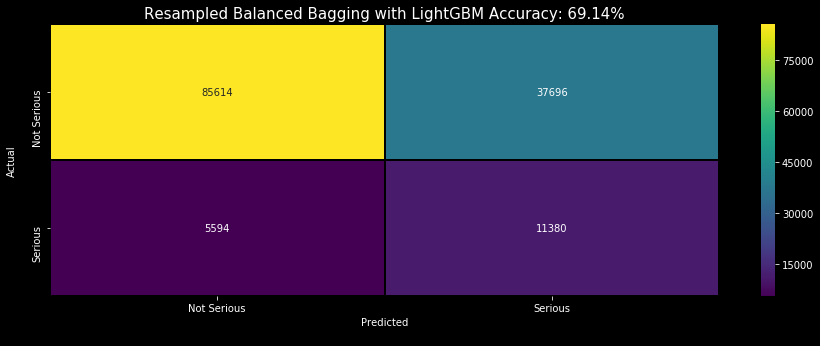


Resampled Balanced Bagging with LightGBM Time:  14753.382143974304


In [26]:
#start
start_res_bbag_w_lgbm = time.time()

# Balanced Bagging Classifier
res_bbag_w_lgbm = BalancedBaggingClassifier(base_estimator=res_lgbm, max_features=X.shape[1], n_estimators=500, replacement=True, 
                                     sampling_strategy='majority', random_state=42)

res_bbag_w_lgbm.fit(X_train, y_train)
pred_res_bbag_w_lgbm = res_bbag_w_lgbm.predict(X_test)


# Creates a confusion matrix
res_bbag_w_lgbm_cm = confusion_matrix(y_test,pred_res_bbag_w_lgbm)

# Transform to df for easier plotting
res_bbag_w_lgbm_cm_df = pd.DataFrame(res_bbag_w_lgbm_cm,
                     index = ['Not Serious','Serious'], 
                     columns = ['Not Serious','Serious'])

plt.figure(figsize=(15,5))

sns.heatmap(res_bbag_w_lgbm_cm_df, annot=True, fmt="d", cmap='viridis', linecolor='black', linewidths=1)
plt.title('Resampled Balanced Bagging with LightGBM Accuracy: {0:.2f}%'.format(accuracy_score(y_test,pred_res_bbag_w_lgbm )*100),
          fontsize=15)
plt.ylabel('Actual\n')
plt.xlabel('Predicted\n')
plt.show()

'''
# print("Resampled Balanced Bagging with LightGBM Classifier Cross Validation Score: {:0.2f}%"
#       .format(np.mean(cross_val_score(res_bbag_w_lgbm, X_train, y_train, cv=5)*100)))
# print('\n')

To save time in this notebook I commented out the cross validation score, however the score from it was:
Resampled Balanced Bagging with LightGBM Classifier Cross Validation Score: 69.57%.

(This can be seen by either running it with it commented in or checking the main notebook)
'''

#end
end_res_bbag_w_lgbm = time.time()
print("\nResampled Balanced Bagging with LightGBM Time: ",end_res_bbag_w_lgbm - start_res_bbag_w_lgbm)

In [27]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred_res_bbag_w_lgbm).ravel()

accuracy = accuracy_score(y_test,pred_res_bbag_w_lgbm)*100
specificity = tn/(tn+fp)*100
fpr = fp/(tn+fp)*100
ers = 100-accuracy

print("Resampled Balanced Bagging Classifier with LightGBM Score Specificity Score: {0:.2f}%".format(specificity))
print("Resampled Balanced Bagging Classifier with LightGBM Score False Positive Rate Score: {0:.2f}%".format(fpr))
print("Resampled Balanced Bagging Classifier with LightGBM Score Error Rate Score: {0:.2f}%".format(ers))

#Check scores
print("Resampled Balanced Bagging Classifier with LightGBM Score Accuracy Score: {:0.2f}%"
      .format(accuracy_score(res_y_test,pred_res_bbag_w_lgbm )*100))
print("Resampled Balanced Bagging Classifier with LightGBM Score F1 Score: {:0.2f}%"
      .format(f1_score(y_test, pred_res_bbag_w_lgbm,average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Score Precision Scoreres_: {:0.2f}%"
      .format(precision_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging Classifier with LightGBM Score Recall Score: {:0.2f}%"
      .format(recall_score(y_test, pred_res_bbag_w_lgbm, average="macro")*100))
print("Resampled Balanced Bagging  Classifier with LightGBM Score Roc Auc Score: {0:.2f}%"
      .format(roc_auc_score(y_test, pred_res_bbag_w_lgbm)*100))

Resampled Balanced Bagging Classifier with LightGBM Score Specificity Score: 69.43%
Resampled Balanced Bagging Classifier with LightGBM Score False Positive Rate Score: 30.57%
Resampled Balanced Bagging Classifier with LightGBM Score Error Rate Score: 30.86%
Resampled Balanced Bagging Classifier with LightGBM Score Accuracy Score: 69.14%
Resampled Balanced Bagging Classifier with LightGBM Score F1 Score: 57.14%
Resampled Balanced Bagging Classifier with LightGBM Score Precision Scoreres_: 58.53%
Resampled Balanced Bagging Classifier with LightGBM Score Recall Score: 68.24%
Resampled Balanced Bagging  Classifier with LightGBM Score Roc Auc Score: 68.24%


The results were better than the other learning algorithms but lower accuracy wise than the previous Balanced Bagging Algorithm. It also took longer than any other algorithm used. Taking all of that into consideration, I have decided that depending on what was the goal, either Balanced Bagging Classifier algorithm could be used. If I were more concerned with overall accuracy, the regular Balanced Bagging Classifier would be used. If I were more concerned with making sure "Serious" predictions were achieved, Balanced Bagging Classifier with LightGBM would be used.

In [28]:
#create list of b_bagging
b_bagging_data={'Learning Algorithm':['Balanced Bagging','Balanced Bagging w/ LGBM' ],
           'Accuracy  Score':[78.53,69.14], 'F1 Score ':[61.97,57.14],
           'Precision Score':[60.58,58.53],'Recall Score':[67.01,68.24],
           'Cross Validation Score':[78.47,69.57],'Specificity Score':[82.21,69.43],
           'Error Rate':[17.79,30.86],'False Positive Rate':[21.47,30.57],
           'Roc Auc Score':[67.01,68.24],'Time':[12142.18031,60178.96671],
           'Learning Library':['Imblearn', 'Imblearn']}
#create dataframe
b_bagging=pd.DataFrame(b_bagging_data) 

b_bagging.head(10)

,Learning Algorithm,Accuracy Score,F1 Score,Precision Score,Recall Score,Cross Validation Score,Specificity Score,Error Rate,False Positive Rate,Roc Auc Score,Time,Learning Library
0,Balanced Bagging,78.53,61.97,60.58,67.01,78.47,82.21,17.79,21.47,67.01,12142.18031,Imblearn
1,Balanced Bagging w/ LGBM,69.14,57.14,58.53,68.24,69.57,69.43,30.86,30.57,68.24,60178.96671,Imblearn


In [29]:
#change time to minutes
b_bagging['Time in Minutes'] = round(b_bagging['Time']/60, 2)

#drop actual Time column
b_bagging=b_bagging.drop('Time',axis=1)

#rearrange columns
b_bagging = b_bagging[['Learning Algorithm', 'Accuracy  Score', 'F1 Score ', 'Precision Score',
                   'Recall Score', 'Cross Validation Score', 'Specificity Score', 'Error Rate',
                   'False Positive Rate','Roc Auc Score','Time in Minutes', 'Learning Library']]
b_bagging.set_index('Learning Algorithm', inplace=True)
b_bagging.head(10)

,Accuracy Score,F1 Score,Precision Score,Recall Score,Cross Validation Score,Specificity Score,Error Rate,False Positive Rate,Roc Auc Score,Time in Minutes,Learning Library
Learning Algorithm,,,,,,,,,,,
Balanced Bagging,78.53,61.97,60.58,67.01,78.47,82.21,17.79,21.47,67.01,202.37,Imblearn
Balanced Bagging w/ LGBM,69.14,57.14,58.53,68.24,69.57,69.43,30.86,30.57,68.24,1002.98,Imblearn


In [30]:
#csv file for Tableau 
b_bagging.to_csv('b_bagging_results.csv') 

In [31]:
%%HTML
<div class='tableauPlaceholder' id='viz1572537010623' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BalancedBaggingComparisons&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BalancedBaggingComparisons&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BalancedBaggingComparisons&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1572537010623');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Genesis L. Taylor<br>
[Github](https://github.com/GenTaylor/) | [Linkedin](https://linkedin.com/in/genesistaylor/) | [Tableau](https://public.tableau.com/profile/genesis.taylor#!/) | [genesisltaylor@gmail.com](mailto:genesisltaylor@gmail.com)
